In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Product defects ##

A manufacturing plant produces a specific product, and defects can be categorized into four types. Based on historical data, the company expects the following distribution of defect types:

50% of the products are expected to be defect-free.

20% of the products are expected to have Type A defects.

15% of the products are expected to have Type B defects.

15% of the products are expected to have Type C defects.




The company inspects 400 products, and the observed distribution of defect types is:

250 products were defect-free.

50 products had Type A defects.

40 products had Type B defects.

60 products had Type C defects.

In [5]:
#Let's create a table
defects = pd.DataFrame({'Type': ['No', 'A', 'B', 'C']})
defects

,Type
0,No
1,A
2,B
3,C


In [41]:
#Let's add more columns
defects['Past'] = [0.5, 0.2, 0.15, 0.15]
defects['Observed'] = [250/400, 50/400, 40/400, 60/400]
defects

,Type,Past,Obsererved,Observed
0,No,0.50,0.625,0.625
1,A,0.20,0.125,0.125
2,B,0.15,0.100,0.100
3,C,0.15,0.150,0.150


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

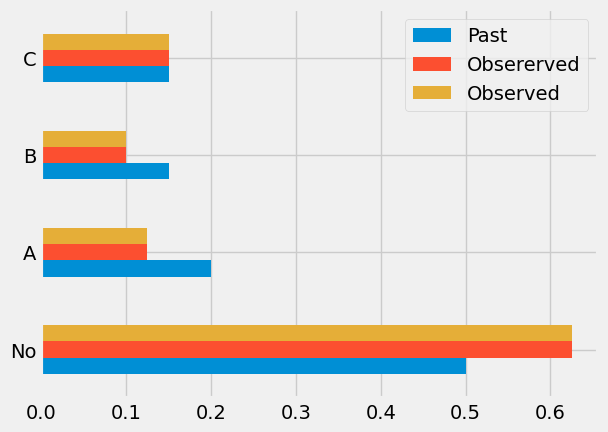

In [42]:
#plot
defects.plot(kind='barh').set_yticklabels(defects['Type'])

In [43]:
# Under the model, this is the true distribution of defects
# from which products are randomly sampled
outcomes = ['No', 'A', 'B', 'C']
model = [0.5, 0.2, 0.15, 0.15]

In [44]:
#let's determine the percentage of each outome from the model distribution
simulated = np.random.choice(outcomes, p=model, size=400)

result=[]
for i in outcomes:
    result.append(sum(simulated==i)/400)

print(result)

[np.float64(0.5275), np.float64(0.1925), np.float64(0.1475), np.float64(0.1325)]


In [45]:
# Let's simulate a random draw of 400 products from the model distribution
def sample():
    simulated = np.random.choice(outcomes, p=model, size=400)
    result=[]
    for i in outcomes:
        result.append(sum(simulated==i)/400)

    return result

#sample() 

In [46]:
# Let's put this into a table


defects_with_simulated = defects.copy()
defects_with_simulated['Simulated'] = result
defects_with_simulated

,Type,Past,Obsererved,Observed,Simulated
0,No,0.50,0.625,0.625,0.5275
1,A,0.20,0.125,0.125,0.1925
2,B,0.15,0.100,0.100,0.1475
3,C,0.15,0.150,0.150,0.1325


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

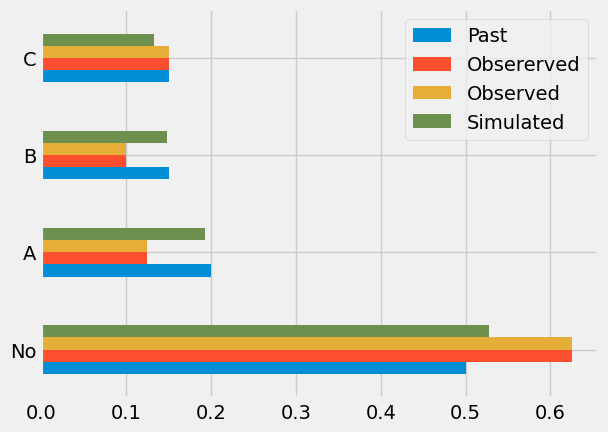

In [47]:
#Let's plot this
defects_with_simulated.plot(kind='barh').set_yticklabels(defects_with_simulated['Type'])

## Distance Between Distributions

In [48]:
# We need to understand how each of the 4 categories
# differ from their expected values according to the model.
differ = defects['Observed'] - defects['Past']
defects_with_difference = defects.copy()
defects_with_difference['Difference'] = differ
defects_with_difference

,Type,Past,Obsererved,Observed,Difference
0,No,0.50,0.625,0.625,0.125
1,A,0.20,0.125,0.125,-0.075
2,B,0.15,0.100,0.100,-0.050
3,C,0.15,0.150,0.150,0.000


## Total Variation Distance

In [49]:
#Let's define total variation distance
def total_variation_distance(distance1, distance2):
    return sum(abs(distance1 - distance2))/2

In [50]:
# The TVD of our observed data (observed) from their expected values
# assuming the model is true (past)
observed_tvd = total_variation_distance(defects['Past'], defects['Observed'])
observed_tvd

0.125

In [37]:
# The TVD of a model simluation from its expected values
total_variation_distance(sample(), defects['Past'])

0.0625

In [58]:
#Let's put this into a function
def simulated_tvd():
    return total_variation_distance(sample(), defects['Past'])

# Initialize a list to store the results of each simulation
total_variation_distance_results = []

number_simulation = 10000

for _ in range(number_simulation):
    # Compute the Total Variation Distance for this simulation
    tvd = simulated_tvd()
    # Append the result to the list
    total_variation_distance_results.append(tvd)

# Now, total_variation_distance_results contains the TVD results for all simulations




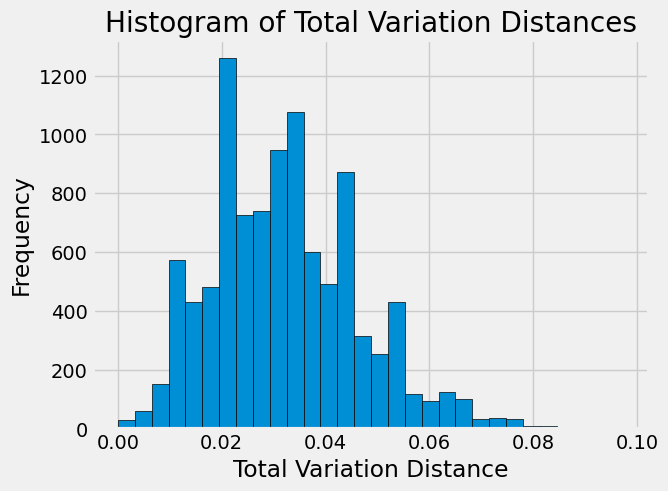

In [62]:
#Let's plot the results
df = pd.DataFrame({'TVDS': total_variation_distance_results})
df.hist(column='TVDS', bins=30, edgecolor='black')
plots.xlabel('Total Variation Distance')
plots.ylabel('Frequency')
plots.title('Histogram of Total Variation Distances')
plots.show()